# COGS 118A - Final Project

# Predicting K-Complexes and Spindles 

## Group members

- Satomi Ito
- Pudan Xu 
- Joakim Nguyen
- Wilson Tan
- Boyong Liu

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

The project focuses on EEG data bad being able to extract data from it. We are focusing on k-complexes and spindles. Our goal is to utilize EEG data that was gained form sleeping and napping to automate k-complex and spindles from thirty brains and apply them to Machine learning algorithms that we learned in class. We will be separating out k-complexes, spindles, and neither. Using this cleaned and labeled data, we can train our model to classify these three classes.

# Background

This study consists of thirty brains and over hundred thousands of data. Before we dive into the technicals of predicting the k complex and spindle, we need to understand how the mind works when people go to sleep. There are four stages of sleep. When a person goes to sleep, bursts of neural oscillatory activity happens, which is the pattern of neural activityin the central nervous system. Stages 1 to 3 are called non-rapid eye movement (NREM) sleep, also known as quiet sleep. Stage 4 is rapid eye movement (REM) sleep, also known as active sleep or paradoxical sleep [1].

In order to better analyze the brain activity in sleep, scientists use electroencephalogram (EEG), a non-invasive test that records brain activity. There are 2 hallmarks of non-rapid eye movement (NREM) - 2 sleep stage: the large multicomponent K-complex (KC) and the rhythmic spindle. Both of them can be seen on electroencephalography (EEG) [2].

According to a clinical psychologist, John Cline, “K complexes are large waves that stand out from the background and often occur in response to environmental stimuli such as sounds in the bedroom. Sleep spindles are brief bursts of fast activity that appear something like the shape of an "eye" as they rapidly increase in amplitude and then rapidly decay.” [3]

Manual data labeling can take large amounts of time since it requires human perusal of large amounts of data. "Manual data labeling has the potential to be somewhat labour intensive. Each instance of labeling may take seconds but the multiplicative effect of thousands of images could create a backlog and impede a project." [4] Because of this issue, automation of image labeling is highly important as it can save time and energy as well as create a smooth and efficient workflow.  

# Problem Statement

Manually labeling data is laborious and time consuming, so automated labeling would allow for more efficient time usage. In the case of sleep wave recordings done by an EEG, K-complexes and spindles are often labeled because they're important patterns that provide valuable information about brain activity. In this project, we looked at a multiclass classification problem, in sleep wave recordings from an EEG in an attempt to correctly classify these patterns using supervised machine learning models. These classes being k-complex, spindle, or neither. By training models to classify these patterns, we're able to easily identify these different classes by presenting chunks of wave recordings at a time. By autonomously classifying these k-comploxes and spindles within wave recordings, it solves the issue of manual labeling k-complexs and spindles which in turn allows for more efficient use of time and resources. 

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kcomplex = np.load(os.getcwd() + '/epoch_data/kcomplex.npy')
non_kcomplex = np.load(os.getcwd() + '/epoch_data/non_kcomplex.npy')

spind = np.load(os.getcwd() + '/epoch_data/spind.npy')
non_spind = np.load(os.getcwd() + '/epoch_data/non_spind.npy')

In [ ]:
# DataFrame for kcomplexes to be labeled '1'
# dimension of epochs by voltage_samples
pd.DataFrame(kcomplex[:,0,:]).head(5)

In [ ]:
# DataFrame for non-kcomplexes to be labeled '0'
# dimension of epochs by voltage_samples
pd.DataFrame(non_kcomplex[:,0,:]).head(5)

In [ ]:
# Sample of 5 consecutive epochs for non-spindles
resample_size = 100
time_int = np.linspace(0,1,resample_size)
fig, axs = plt.subplots(1, 5, figsize=(50, 3))
for i in range(5):
    axs[i].plot(time_int, non_spind[i,0,:])
    axs[i].set_ylabel('uV')
    axs[i].set_xlabel('time (s)')

In [ ]:
# Sample of 5 consecutive epochs for spindles
time_int = np.linspace(0,1,resample_size)
fig, axs = plt.subplots(1, 5, figsize=(50, 3))
for i in range(5):
    axs[i].plot(time_int, spind[i,0,:])
    axs[i].set_ylabel('uV')
    axs[i].set_xlabel('time (s)')

In [ ]:
# Sample of 5 consecutive epochs for non-k-complexes
time_int = np.linspace(0,1,resample_size)
fig, axs = plt.subplots(1, 5, figsize=(50, 3))
for i in range(5):
    axs[i].plot(time_int, non_kcomplex[i,0,:])
    axs[i].set_ylabel('uV')
    axs[i].set_xlabel('time (s)')

In [ ]:
# Sample of 5 consecutive epochs for k-complexes
time_int = np.linspace(0,1,resample_size)
fig, axs = plt.subplots(1, 5, figsize=(50, 3))
for i in range(5):
    axs[i].plot(time_int, kcomplex[i,0,:])
    axs[i].set_ylabel('uV')
    axs[i].set_xlabel('time (s)')

# Proposed Solution

As a baseline model, we will be using K-Nearest Neighbors (KNN) with the default sklearn settings. We chose KNN because it has fairly good predictive power and the results we get from model are easily explainable. Also we believe we have enough data to overcome the curse of dimensionality.

Another model we'll be using is a Support Vector Machine (SVM) and because SVMs are binary classifiers, we can use a One vs One. SVMs also don't have a probability or confidence that can be compared and so we are unable to use One vs Rest, however, with only 3 classes, the number of classifiers we need for One vs One is only 3. We will also experiment with different parameters such as, how much we care about the loss metric, whether we want to use a linear, polynomial, or radial kernel, degree and gamma values if appropriate.

In addition to this, we'll use a Convolutional Neural Network (CNN). CNNs allow for automatic feature detections through a series of convolution and pooling operations which make them an appropriate model for classification. Since k-complexes, spindles, and neither all contain unique features to them, for example a k-complexes unique peak and trough or a spindles high burst of activity, an ideal CNN would detect these unique features and categorize them appropriately. In addition to this, we believe we have large enough data to train a CNN as well.

We have large amounts of data, so we can choose to use a simple train and test or we can implement a K-Fold Cross-Validation.

# Evaluation Metrics

This project looks at binary classification, so, we can use the typical binary classification loss which is the proportion of data points labeled correctly. In this case it would be the proportion of K-complex and Spindles labeled correctly. This would simply be the number of images labeled correctly divided by the number of images. $$ e = \frac{1}{n}\sum_{i=1}^{n} 1(y_i \neq f(x_i; W)) $$
However, this loss has an infinite gradient when going from correct to incorrect decision and zero gradient everywhere else which makes it very hard to minimize. Therefore, it may be best to only use this as a baseline.

Another common classification metric would be to maximize the area under the ROC curve. By maximizing the area under the ROC curve. Because area under the curve corresponds to how good the model is, maximizing ROC-AUC could be another potential metric evaluation. We considered the ROC as a potential metric because it would give use the opportunity to visualize thresholds and the proportion of false negatives to false positives the model makes.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Results


### Subsection 1: Data

Our data consists of k-complex, sleep spindle, and neither wave patterns. We can first visualize our data.

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import glob

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers, models, metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, StratifiedKFold, cross_val_score, learning_curve, validation_curve
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix, accuracy_score, roc_auc_score

In [38]:
data = np.load("./dataset.npy")
labels = np.load("./dataset_labels.npy")
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

Neither


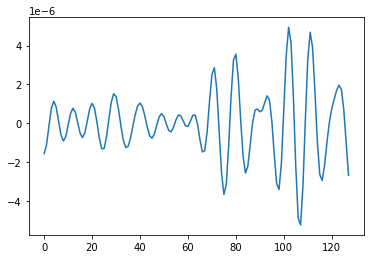

K-complex: 1-9kHz


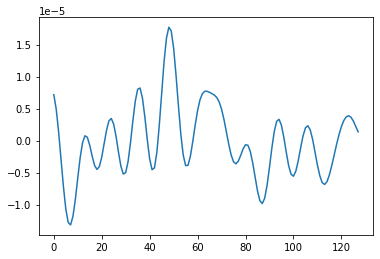

Spindle: 10-16kHz


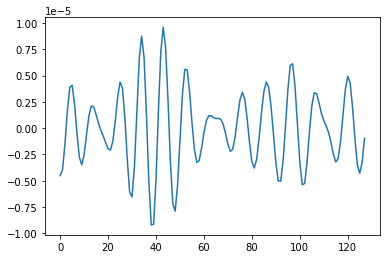

In [3]:
print("Neither")
plt.plot(np.arange(0,128), X_train[20000])
plt.show()
print("K-complex: 1-9kHz")
plt.plot(np.arange(0,128), X_train[0])
plt.show()
print("Spindle: 10-16kHz")
plt.plot(np.arange(0,128), X_train[10000])
plt.show()

When visualizing the data, we can see some distinct features of k-complexes, spindles, and neither. For example, the neither waves have higher peaks and the K-complex waves have noticeably lower frequencies. One possible approach we could take would be to use a convolutional neural network. Ideally, it would be able to autonomously detect these features and classify them accordingly.

Although there are high dimensions, another method that could work would be K-nearest neighbors. This is because (1) we have a lot of data so this will help fight the effects of "curse of dimensionality" and (2) because of the unique shapes of k-complexes, spindles, and neither, the values for each dimension will hopefully differ enough where KNN can provide decent classification. 

Lastly, we can use support vector machines with the kernel trick because of high dimensionality. Although K-nearest-neighbors might be able to perform well, there's also a good chance that it may not due to the high dimensions. Therefore, we can also use support vector machines which works well with high dimensions due to their use of support vectors.

### Subsection 2: Base Model

As the baseline model, we can use the default K-Nearest neighbors model from sklearn.

In [6]:
model = KNeighborsClassifier()

model.fit(X_train, np.ravel(y_train))
model.score(X_test, y_test)

AttributeError: 'NoneType' object has no attribute 'split'

C:\Users\wilso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\wilso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\wilso\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\wilso\anaconda3\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\wilso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 219, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\wilso\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 763, in kneighbors
    res

NameError: name 'valid_scores' is not defined

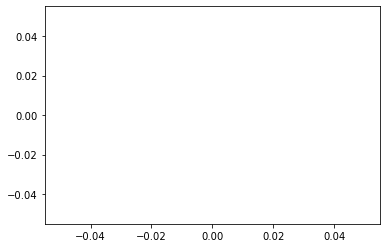

In [7]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, np.ravel(y_train), cv=10)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="Training score")
plt.plot(train_sizes,np.mean(valid_scores,axis=1), label="Cross-validation score")
plt.legend()
plt.show()

### Subsection 3: Hyperparameter/Model Selection

We can begin tuning and creating more complex models to determine how well these different models will perform. In addition to K-nearest neighbors, we'll also take a look at two models that should have higher predictive power, support vector machines and convolutional neural networks.

#### K-Nearest Neighbors

Hyperparameter selection for a K-nearest neighbors model with the typical accuracy metric. 

In [42]:
model = KNeighborsClassifier()
param_grid = {
    'KNN__algorithm': ["ball_tree", "kd_tree"],
    'KNN__leaf_size': [3, 15, 30],
    'KNN__n_neighbors': [3, 5],
    'KNN__weights': ["uniform"],
#     'KNN__p': [1, 2],
}
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
pipe = Pipeline(steps=[("imputer", imp), ("KNN", model)])
print(pipe.get_params())

grid = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, verbose=3)

iters = int(X_train.shape[0] / 10000)

for i in range(iters):
    print(f"Iteration {i+1} out of {iters}: ")
    grid.fit(np.squeeze(X_train[i*1000:i*1000 + 1000]), np.squeeze(y_train[i*1000:i*1000 + 1000]))

print(grid.cv_results_)

{'memory': None, 'steps': [('imputer', SimpleImputer()), ('KNN', KNeighborsClassifier())], 'verbose': False, 'imputer': SimpleImputer(), 'KNN': KNeighborsClassifier(), 'imputer__add_indicator': False, 'imputer__copy': True, 'imputer__fill_value': None, 'imputer__missing_values': nan, 'imputer__strategy': 'mean', 'imputer__verbose': 'deprecated', 'KNN__algorithm': 'auto', 'KNN__leaf_size': 30, 'KNN__metric': 'minkowski', 'KNN__metric_params': None, 'KNN__n_jobs': None, 'KNN__n_neighbors': 5, 'KNN__p': 2, 'KNN__weights': 'uniform'}
Iteration 1 out of 35: 
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END KNN__algorithm=ball_tree, KNN__leaf_size=3, KNN__n_neighbors=3, KNN__weights=uniform;, score=0.630 total time=   0.0s
[CV 2/5] END KNN__algorithm=ball_tree, KNN__leaf_size=3, KNN__n_neighbors=3, KNN__weights=uniform;, score=0.670 total time=   0.0s
[CV 3/5] END KNN__algorithm=ball_tree, KNN__leaf_size=3, KNN__n_neighbors=3, KNN__weights=uniform;, score=0.605 total

KeyboardInterrupt: 

In [ ]:
print(grid.best_estimator_)
total = 0
iters = int(X_test.shape[0] / 1000)
for i in range(iters):
    print(f"Iteration {i+1} of {iters}: ")
    total += accuracy_score(y_test[i*1000:i*1000 + 1000], grid.predict(np.squeeze(X_test[i*1000:i*1000 + 1000])))
    
print(f"Mean accuracy: {total/iters}")

### Convolutional Neural Network

Hyperparameter selection for a convolutional neural network using the typical accuracy metrics

In [36]:
def build_cnn(v_activation="relu", v_optimizer="adam"):
    cnn = models.Sequential()
    cnn.add(layers.Conv1D(32, 2, activation=v_activation, input_shape=(X_train[0].shape[0], 1)))
    cnn.add(layers.MaxPooling1D(3))
    cnn.add(layers.Conv1D(16, 2, activation=v_activation))
    cnn.add(layers.MaxPooling1D(3))
    cnn.add(layers.Conv1D(16, 2, activation=v_activation))
    cnn.add(layers.MaxPooling1D(3))
    cnn.add(layers.Flatten())
    cnn.add(layers.Dense(48, activation=v_activation))
    cnn.add(layers.Dense(2))
    cnn.compile(optimizer=v_optimizer, loss=tf.keras.losses.CosineSimilarity(), metrics=["accuracy"])
    return cnn

In [23]:
# Define parameter grid
activations = ["tanh", "relu", "sigmoid"]
optimizers = ["sgd", "adam"]
batch_size = [16, 32, 64]
params = dict(
    v_activation = activations,
    v_optimizer= optimizers,
    batch_size = batch_size
)

cnn = build_cnn()
cnn.summary()

# Use sklearn wrapper to use randomized search grid
model = KerasClassifier(build_fn=build_cnn, epochs=2, batch_size=16)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_72 (Conv1D)          (None, 127, 32)           96        
                                                                 
 max_pooling1d_72 (MaxPoolin  (None, 42, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_73 (Conv1D)          (None, 41, 16)            1040      
                                                                 
 max_pooling1d_73 (MaxPoolin  (None, 13, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_74 (Conv1D)          (None, 12, 16)            528       
                                                                 
 max_pooling1d_74 (MaxPoolin  (None, 4, 16)          

<ipython-input-23-0f0f24ee6bf6>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_cnn, epochs=1, batch_size=16)


In [37]:
gscv = GridSearchCV(model, params, cv=2, verbose=3)
gscv.fit(X_train, np.ravel(y_train))

print(rscv.cv_results_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
8258/8258 [==============================] - 33s 4ms/step - loss: 0.4448 - accuracy: 0.2930
[CV 1/2] END batch_size=16, v_activation=tanh, v_optimizer=sgd;, score=0.293 total time= 1.5min
8258/8258 [==============================] - 33s 4ms/step - loss: 0.4466 - accuracy: 0.5003
[CV 2/2] END batch_size=16, v_activation=tanh, v_optimizer=sgd;, score=0.500 total time= 1.5min
8258/8258 [==============================] - 32s 4ms/step - loss: 0.4404 - accuracy: 0.5011
[CV 1/2] END batch_size=16, v_activation=tanh, v_optimizer=adam;, score=0.501 total time= 1.5min
8258/8258 [==============================] - 33s 4ms/step - loss: 0.4421 - accuracy: 0.2942
[CV 2/2] END batch_size=16, v_activation=tanh, v_optimizer=adam;, score=0.294 total time= 1.5min
8258/8258 [==============================] - 33s 4ms/step - loss: 0.4434 - accuracy: 0.2930
[CV 1/2] END batch_size=16, v_activation=relu, v_optimizer=sgd;, score=0.293 total time= 1.5m

KeyboardInterrupt: 

In [13]:
pred = rscv.predict(X_test)
print("Accuracy of the best model: ")
print(accuracy_score(y_test, pred))

print("Best model: ")
print(rscv.best_estimator_)

print("Prediction: ")
print(pred)
print(np.unique(pred, return_counts=True))
print("True: ")
print(np.ravel(y_test))


4/4 [==============================] - 0s 18ms/step
Accuracy of the best model: 
0.4336283185840708
Best model: 
Prediction: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(array([0.]), array([113], dtype=int64))
True: 
[2. 2. 1. 0. 1. 0. 1. 1. 0. 2. 2. 2. 0. 0. 1. 2. 2. 0. 0. 2. 1. 0. 1. 1.
 2. 0. 0. 2. 0. 2. 1. 0. 0. 0. 1. 1. 2. 2. 0. 2. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 2. 1. 1. 0. 2. 0. 1. 1. 2. 1. 1. 1. 2. 1. 1. 0. 1. 0. 2. 0.
 1. 1. 1. 1. 0. 0. 0. 2. 0. 1. 0. 0. 2. 0. 2. 2. 0. 2. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 2. 1. 0. 1. 1. 0. 2. 2.]


### Support Vector Machine

(INCOMPLETE)

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [18]:
X = np.load("./dataset.npy")
y = np.load("./dataset_labels.npy")

first_idx = 0
samps = 10
for label in [-1, 1, 0]:
    last_idx = y[y == label].shape[0] + first_idx
    idx = [np.random.randint(first_idx, last_idx) for _ in range(samps)]
    first_idx = last_idx
    fig, axs = plt.subplots(1, samps, figsize=(20+2*samps, 3))
    for i, ax in zip(idx, axs):
        ax.plot(np.arange(128), X[i]);

FileNotFoundError: [Errno 2] No such file or directory: '/User/Desktop/dataset.npy'

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.33, random_state=42)



NameError: name 'data' is not defined

In [20]:
#Calculating SVM without breaking up data but it takes too long
model = svm.SVC(kernel ='linear', C = 1, random_state = 0).fit(X_train, y_train)


accuracy = model.score(X_test,y_test)

accuracy

NameError: name 'X_train' is not defined

In [ ]:
#breaking up the datasets (by 10000?)

In [ ]:
X_train_1 = X_train[:10000]
X_test_1 = X_test[:10000]

In [ ]:
y_train_1 = y_train[:10000]
y_test_1 = y_test[:10000]

In [2]:
#calculating accuracy for the first 10,000s....
model_1 = svm.SVC(kernel ='linear', C = 1, random_state = 0).fit(X_train_1, y_train_1)


accuracy_1 = model_1.score(X_test_1,y_test_1)

accuracy_1

NameError: name 'X_train_1' is not defined

In [3]:
y_train_2 = y_train[:10000:]
y_test_2 = y_test[:10000:]

NameError: name 'y_train' is not defined

In [ ]:
X_train_2 = X_train[:10000:]
X_test_2 = X_test[:10000:]

In [ ]:
#calculating accuracy for the otherhalf
model_2 = svm.SVC(kernel ='linear', C = 1, random_state = 0).fit(X_train_2, y_train_2)


accuracy_2 = model_2.score(X_test_2,y_test_2)

accuracy_2

In [22]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=3, facecolors='none', edgecolor='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plot_svm(model, N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model.fit(X, y)
    
    ax = ax or plt.gca()
    sns.scatterplot(X[:, 0], X[:, 1], hue=y, s=75, ax=ax)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

### Subsection 4: Model Comparisons

Now, we can take a look at performance across all models to determine whether the models with higher predictive power were able to outperform our tuned K-nearest neighbors model

Learning curve for the Convolutional Neural Network model

26/26 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.3515


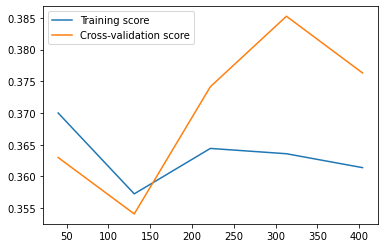

In [14]:
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, np.ravel(y_train), cv=10)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="Training score")
plt.plot(train_sizes,np.mean(valid_scores,axis=1), label="Cross-validation score")
plt.legend()
plt.show()

Learning curve for best KNN with accuracy metric

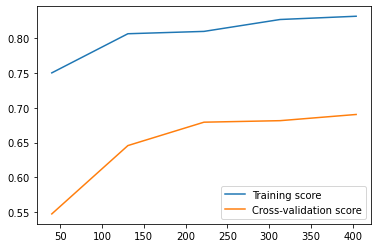

In [15]:
train_sizes, train_scores, valid_scores = learning_curve(grid_1.best_estimator_[1], X_train, np.ravel(y_train), cv=10)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="Training score")
plt.plot(train_sizes,np.mean(valid_scores,axis=1), label="Cross-validation score")
plt.legend()
plt.show()

### Subsection 5: Other

Other KNN, CNN, and Multilayered Perceptron (MLP) models were also explored using gird search, random search, and cross validation to tune hyperparameters for these different models. Results showed approximately 80% testing accuracy for the best KNN model when trained using the accuracy metric, approximately 70% testing accuracy for the best KNN when trained using the ROC AUC metric, and 40% testing accuracy for CNN and MLP models. However, this was all done using a smaller dataset consisting of only around 1000 data points which is nowhere near enough data to properly train a CNN or MLP. The 40% was achieved because they were only predicting one class. This showed how although some models have more predictive power than others, there are practical limitations, such as data limitation, that affect what the "best" model is.

# Discussion

### Interpreting the result

There's a large emphasis placed on getting the best performance score, like  determining the state of the art model for specific tasks based on a model's highest performance score. But, performance score isn't the only thing to consider when selecting which supervised machine learning algorithm you want to employ. There are other things to consider, like variability, average performance, performance on different types of metrics, and more. 

However, there are even more practical reasons why the "best" model isn't just the model with the best performance score. Hardware limitations, data limitations, time limitations, etc., are all practical issues that can cause even state of the art models to perform at chance level.

[compare performance]

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Originially, our dataset consisted of 500000-600000 data points, but due to a data issue, only around 10000 were viable. Then, when balancing out the dataset, only 1000 data points were available which is nowhere near enough data to train a convolutional neural network. With too many similar points and only being able to use 1000 data points meant that we had a severe lack in data. More data would have been beneficial, but because of a late catch on the data similarity, we were unable to fix this in time. More data would have allowed for the neural networks to train properly and help counteract the issue of "curse of dimensionality" in the K-nearest-neighbor models.

The lack in data issue was solved and we were able to get a dataset of 528504 data points, but we were unable to perform thorough hyperparameter selection with the data for some models due to a lack of time. Instead, the KNN and CNN models were mostly designed and tuned on a smaller dataset.

Another limitation comes from the data. We were unable to attain labels and epoch samples of actual K-complexes, spindles, or neither waves. Instead, we used Fourier transform to filter out specific wave frequencies corresponding to K-complex and spindles in order to get the dataset. Therefore, it's more so a problem of frequency classification rather than K-complex, spindles, or neither classification.

Another limitation came with the SVM modelling. Rhe limitations was that the dataset was too large. When conducting the SVM test, the dataset had to be broken down to smaller sets as it would take hours if I tried to run it without breaking down the dataset. 

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

The data used in this project come from human participants. However, this project doesn’t use any personally identifiable information nor does it require any further human participation. Also, the data used in the original EEG experiment involved informed consent and is permitted to be used non-commercially.

We did not label the data and are unable to determine whether the data was correctly labeled. One way that could help this issue would be to look at other examples of K-complexes and Spindles and compare to see whether they look similar to the corresponding labeled images. An issue with this is we would be slightly unconfident in identifying the correct labels for certain images due to a lack of expertise.

Because our data has high dimensions, there is a worry about the “curse of dimensionality”. However, we’re confident that we will still be able to get good training sets because of the abundance of data available to counteract the lower proportional representation.

One issue arises from the fact that our model will not predict with 100 percent accuracy. If the model is used for K-complex and Spindle classification, the class prediction of an image would still need to be verified by a human. The problem arises when this verification is ignored and the prediction of the model is taken as absolutely correct. Not only could this impact the results of studies, but also the waste of resources that go into those studies. Some ways to counter this would be to run classification on the images with multiple models and use the majority classification across the models which could help make more accurate predictions. We could also be transparent about our results and inform users that the model isn’t perfect and the results require verification. In the worst case scenario we will recall the entire algorithm.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
1:The 4 Stages of Sleep. What's Happening During NREM and REM Sleep

https://www.verywellhealth.com/the-four-stages-of-sleep-2795920



2:The Emergence of Spindles and K-Complexes and the Role of the Dorsal Caudal Part of the Anterior Cingulate as the Generator of K-Complexes

https://www.frontiersin.org/articles/10.3389/fnins.2019.00814/full



3:Sleep Spindles. Sleep spindles signal processes that refresh our memories.

https://www.psychologytoday.com/us/blog/sleepless-in-america/201104/sleep-spindles

4:A high-density scalp EEG dataset scquired during brief naps after a visual working memory task

https://www.sciencedirect.com/science/article/pii/S2352340918304268?via%3Dihub

5:Automated Data Labeling vs Manual Data Labeling: Optimizing Annotation

https://keymakr.com/blog/automated-data-labeling-vs-manual-data-labeling-optimizing-annotation/
